In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\Sandy\\Desktop\\project')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Comcast.csv')
dataset

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels
dataset['Date_month_year']=dataset['Date_month_year'].apply(pd.to_datetime)
dataset=dataset.set_index('Date_month_year')

Text(0.5, 1.0, 'MONTHLY TREND CHART')

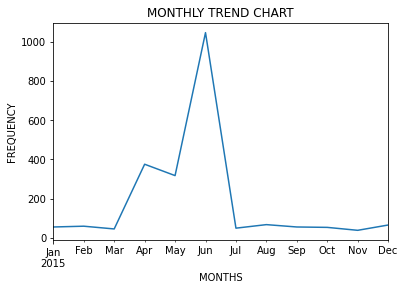

In [5]:
months= dataset.groupby(pd.Grouper(freq="M")).size().plot()
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")

In [6]:
dataset['Date'].value_counts(dropna=False)

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
           ... 
05-10-15      7
24-05-15      7
04-05-15      6
04-11-15      5
05-03-15      5
Name: Date, Length: 91, dtype: int64

Text(0.5, 1.0, 'DAILY TREND CHART')

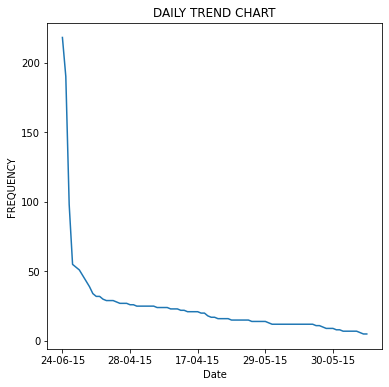

In [7]:
dataset= dataset.sort_values(by='Date')
plt.figure(figsize=(6,6))
dataset['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("FREQUENCY")
plt.title("DAILY TREND CHART")

In [8]:
# table with the frequency of complaint types.
dataset['Customer Complaint'].value_counts(dropna=False)[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Name: Customer Complaint, dtype: int64

<AxesSubplot:>

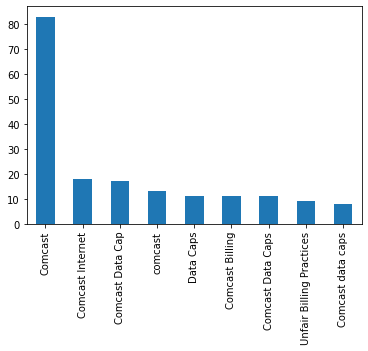

In [9]:
dataset['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

In [10]:
# States with maximum complaints
dataset.groupby(["State"]).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [12]:
# State with maximum complaints
dataset.Status.unique()
dataset["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in dataset["Status"]]
dataset= dataset.drop(['Status'], axis=1)

In [14]:
dataset.groupby(["State"]).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [15]:
#State wise status of complaints in a stacked bar chart
Status_complaints = dataset.groupby(["State","newStatus"]).size().unstack()
print(Status_complaints)

newStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

In [ ]:
# States with highest percentage of unresolved complaints

newStatus             Closed  Open  Unresolved_cmp_prct
State                                                  
Georgia                208.0  80.0            15.473888
California             159.0  61.0            11.798839
Tennessee               96.0  47.0             9.090909
Florida                201.0  39.0             7.543520
Illinois               135.0  29.0             5.609284
Washington              75.0  23.0             4.448743
Michigan                92.0  23.0             4.448743
Colorado                58.0  22.0             4.255319
Texas                   49.0  22.0             4.255319
Pennsylvania           110.0  20.0             3.868472
New Jersey              56.0  19.0             3.675048
Mississippi             23.0  16.0             3.094778
Maryland                63.0  15.0             2.901354
Oregon                  36.0  13.0             2.514507
Virginia                49.0  11.0             2.127660
Massachusetts           50.0  11.0             2

<AxesSubplot:xlabel='State'>

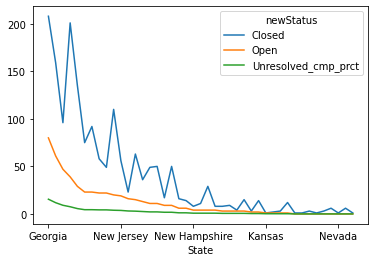

In [17]:
unresolved_data = dataset.groupby(["State",'newStatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
unresolved_data['Unresolved_cmp_prct'] = unresolved_data['Open']/unresolved_data['Open'].sum()*100
print(unresolved_data)
unresolved_data.plot()